# BATTER RUN PREDICTION

### Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Reading the dataset
df = pd.read_csv('ball_by_ball_it20.csv')
# Displaying all columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
# Check the head of the dataset
df.head()

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,0,1,0,[],0,NaN,NaN,1,0,259,NaN,119,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,0,1,0,[],0,NaN,NaN,2,0,259,NaN,118,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,0,0,0,[],1,caught,BA King,2,1,259,NaN,117,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,0,0,0,[],0,NaN,NaN,2,1,259,NaN,116,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,NaN,NaN,6,1,259,NaN,115,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [5]:
df.shape

(425119, 35)

In [6]:
df.describe()

,Unnamed: 0,Match ID,Innings,Over,Ball,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
count,425119.000000,4.251190e+05,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,200304.000000,425119.000000,425119.000000,425119.00000,425119.000000,425119.000000,425119.000000,23659.000000,23659.000000,425119.000000,425119.000000
mean,212559.000000,1.089415e+06,1.471172,9.959395,3.486377,1.139502,0.075132,1.214634,0.040189,0.055653,68.763113,2.748880,153.296171,90.197060,62.797443,0.483994,14.71182,13.952406,12.486560,12.138455,15.386280,13.853502,1.187710,0.959811
std,122721.428881,3.224052e+05,0.499169,5.633134,1.708903,1.546020,0.359310,1.536030,0.196402,0.229250,46.234421,2.283944,38.138024,49.981172,33.835073,0.499744,16.64172,15.976979,11.475981,11.336384,17.408768,11.983127,1.539459,0.196402
min,0.000000,2.110280e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,-39.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106279.500000,9.513730e+05,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,129.000000,51.000000,34.000000,0.000000,2.00000,2.000000,4.000000,3.000000,2.000000,5.000000,0.000000,1.000000
50%,212559.000000,1.233980e+06,1.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,63.000000,2.000000,154.000000,88.000000,64.000000,0.000000,9.00000,8.000000,9.000000,9.000000,9.000000,10.000000,1.000000,1.000000
75%,318838.500000,1.310948e+06,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,101.000000,4.000000,179.000000,126.000000,92.000000,1.000000,21.00000,20.000000,18.000000,18.000000,22.000000,20.000000,1.000000,1.000000
max,425118.000000,1.393328e+06,2.000000,20.000000,7.000000,7.000000,6.000000,8.000000,1.000000,1.000000,278.000000,11.000000,279.000000,273.000000,120.000000,1.000000,172.00000,168.000000,76.000000,74.000000,172.000000,76.000000,8.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

# Cleaning the Data

In [8]:
# Our model will focus on balls batted by only Virat Kohli
# So selecting only those rows where batter is 'V Kohli' 
selected_rows = df[df['Batter'] == 'V Kohli']

In [9]:
# Checking the head of our selected rows
selected_rows.head()

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
5954,5954,1298157,2022-10-27,Sydney Cricket Ground,India,Netherlands,1,3,5,V Kohli,RG Sharma,PA van Meekeren,1,0,1,0,[],0,NaN,NaN,12,1,180,NaN,103,India,0,1,1,1,4,NaN,NaN,1,1
5956,5956,1298157,2022-10-27,Sydney Cricket Ground,India,Netherlands,1,4,1,V Kohli,RG Sharma,BFW de Leede,1,0,1,0,[],0,NaN,NaN,19,1,180,NaN,101,India,0,2,7,2,5,NaN,NaN,1,1
5962,5962,1298157,2022-10-27,Sydney Cricket Ground,India,Netherlands,1,5,1,V Kohli,RG Sharma,FJ Klaassen,0,0,0,0,[],0,NaN,NaN,23,1,180,NaN,95,India,0,2,11,3,10,NaN,NaN,0,1
5963,5963,1298157,2022-10-27,Sydney Cricket Ground,India,Netherlands,1,5,2,V Kohli,RG Sharma,FJ Klaassen,1,0,1,0,[],0,NaN,NaN,24,1,180,NaN,94,India,0,3,11,4,10,NaN,NaN,1,1
5968,5968,1298157,2022-10-27,Sydney Cricket Ground,India,Netherlands,1,6,1,V Kohli,RG Sharma,PA van Meekeren,0,0,0,0,[],0,NaN,NaN,28,1,180,NaN,89,India,0,3,15,5,14,NaN,NaN,0,1


In [10]:
# Dropping all those columns which are not required in our model building
columns_to_drop = ["Unnamed: 0", "Match ID", "Non Striker", "Extra Runs", "Player Out","Batter","Total Non Striker Runs", "Ball Rebowled",
                   "Extra Type","Method","Winner","Chased Successfully","Date","Non Striker Balls Faced","Player Out Runs","Player Out Balls Faced",
                   "Valid Ball","Runs From Ball","Bat First","Bat Second"]
selected_rows.drop(columns_to_drop, axis=1, inplace=True)


In [11]:
selected_rows.head()

,Venue,Innings,Over,Ball,Bowler,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded
5954,Sydney Cricket Ground,1,3,5,PA van Meekeren,1,0,12,1,180,NaN,103,1,1,1
5956,Sydney Cricket Ground,1,4,1,BFW de Leede,1,0,19,1,180,NaN,101,2,2,1
5962,Sydney Cricket Ground,1,5,1,FJ Klaassen,0,0,23,1,180,NaN,95,2,3,0
5963,Sydney Cricket Ground,1,5,2,FJ Klaassen,1,0,24,1,180,NaN,94,3,4,1
5968,Sydney Cricket Ground,1,6,1,PA van Meekeren,0,0,28,1,180,NaN,89,3,5,0


In [12]:
selected_rows.shape

(2798, 15)

In [13]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 5954 to 424298
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Venue                 2798 non-null   object 
 1   Innings               2798 non-null   int64  
 2   Over                  2798 non-null   int64  
 3   Ball                  2798 non-null   int64  
 4   Bowler                2798 non-null   object 
 5   Batter Runs           2798 non-null   int64  
 6   Wicket                2798 non-null   int64  
 7   Innings Runs          2798 non-null   int64  
 8   Innings Wickets       2798 non-null   int64  
 9   Target Score          2798 non-null   int64  
 10  Runs to Get           1367 non-null   float64
 11  Balls Remaining       2798 non-null   int64  
 12  Total Batter Runs     2798 non-null   int64  
 13  Batter Balls Faced    2798 non-null   int64  
 14  Bowler Runs Conceded  2798 non-null   int64  
dtypes: float64(1), i

In [14]:
# Replacing the NaN values in 'Runs to Get' with 0
selected_rows['Runs to Get'].fillna(0, inplace=True)
selected_rows['Runs to Get'] = selected_rows['Runs to Get'].astype(int)
selected_rows.head()

,Venue,Innings,Over,Ball,Bowler,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded
5954,Sydney Cricket Ground,1,3,5,PA van Meekeren,1,0,12,1,180,0,103,1,1,1
5956,Sydney Cricket Ground,1,4,1,BFW de Leede,1,0,19,1,180,0,101,2,2,1
5962,Sydney Cricket Ground,1,5,1,FJ Klaassen,0,0,23,1,180,0,95,2,3,0
5963,Sydney Cricket Ground,1,5,2,FJ Klaassen,1,0,24,1,180,0,94,3,4,1
5968,Sydney Cricket Ground,1,6,1,PA van Meekeren,0,0,28,1,180,0,89,3,5,0


In [15]:
# Checking the null values in selected_rows
selected_rows.isnull().sum()

Venue                   0
Innings                 0
Over                    0
Ball                    0
Bowler                  0
Batter Runs             0
Wicket                  0
Innings Runs            0
Innings Wickets         0
Target Score            0
Runs to Get             0
Balls Remaining         0
Total Batter Runs       0
Batter Balls Faced      0
Bowler Runs Conceded    0
dtype: int64

# Visualising the Data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

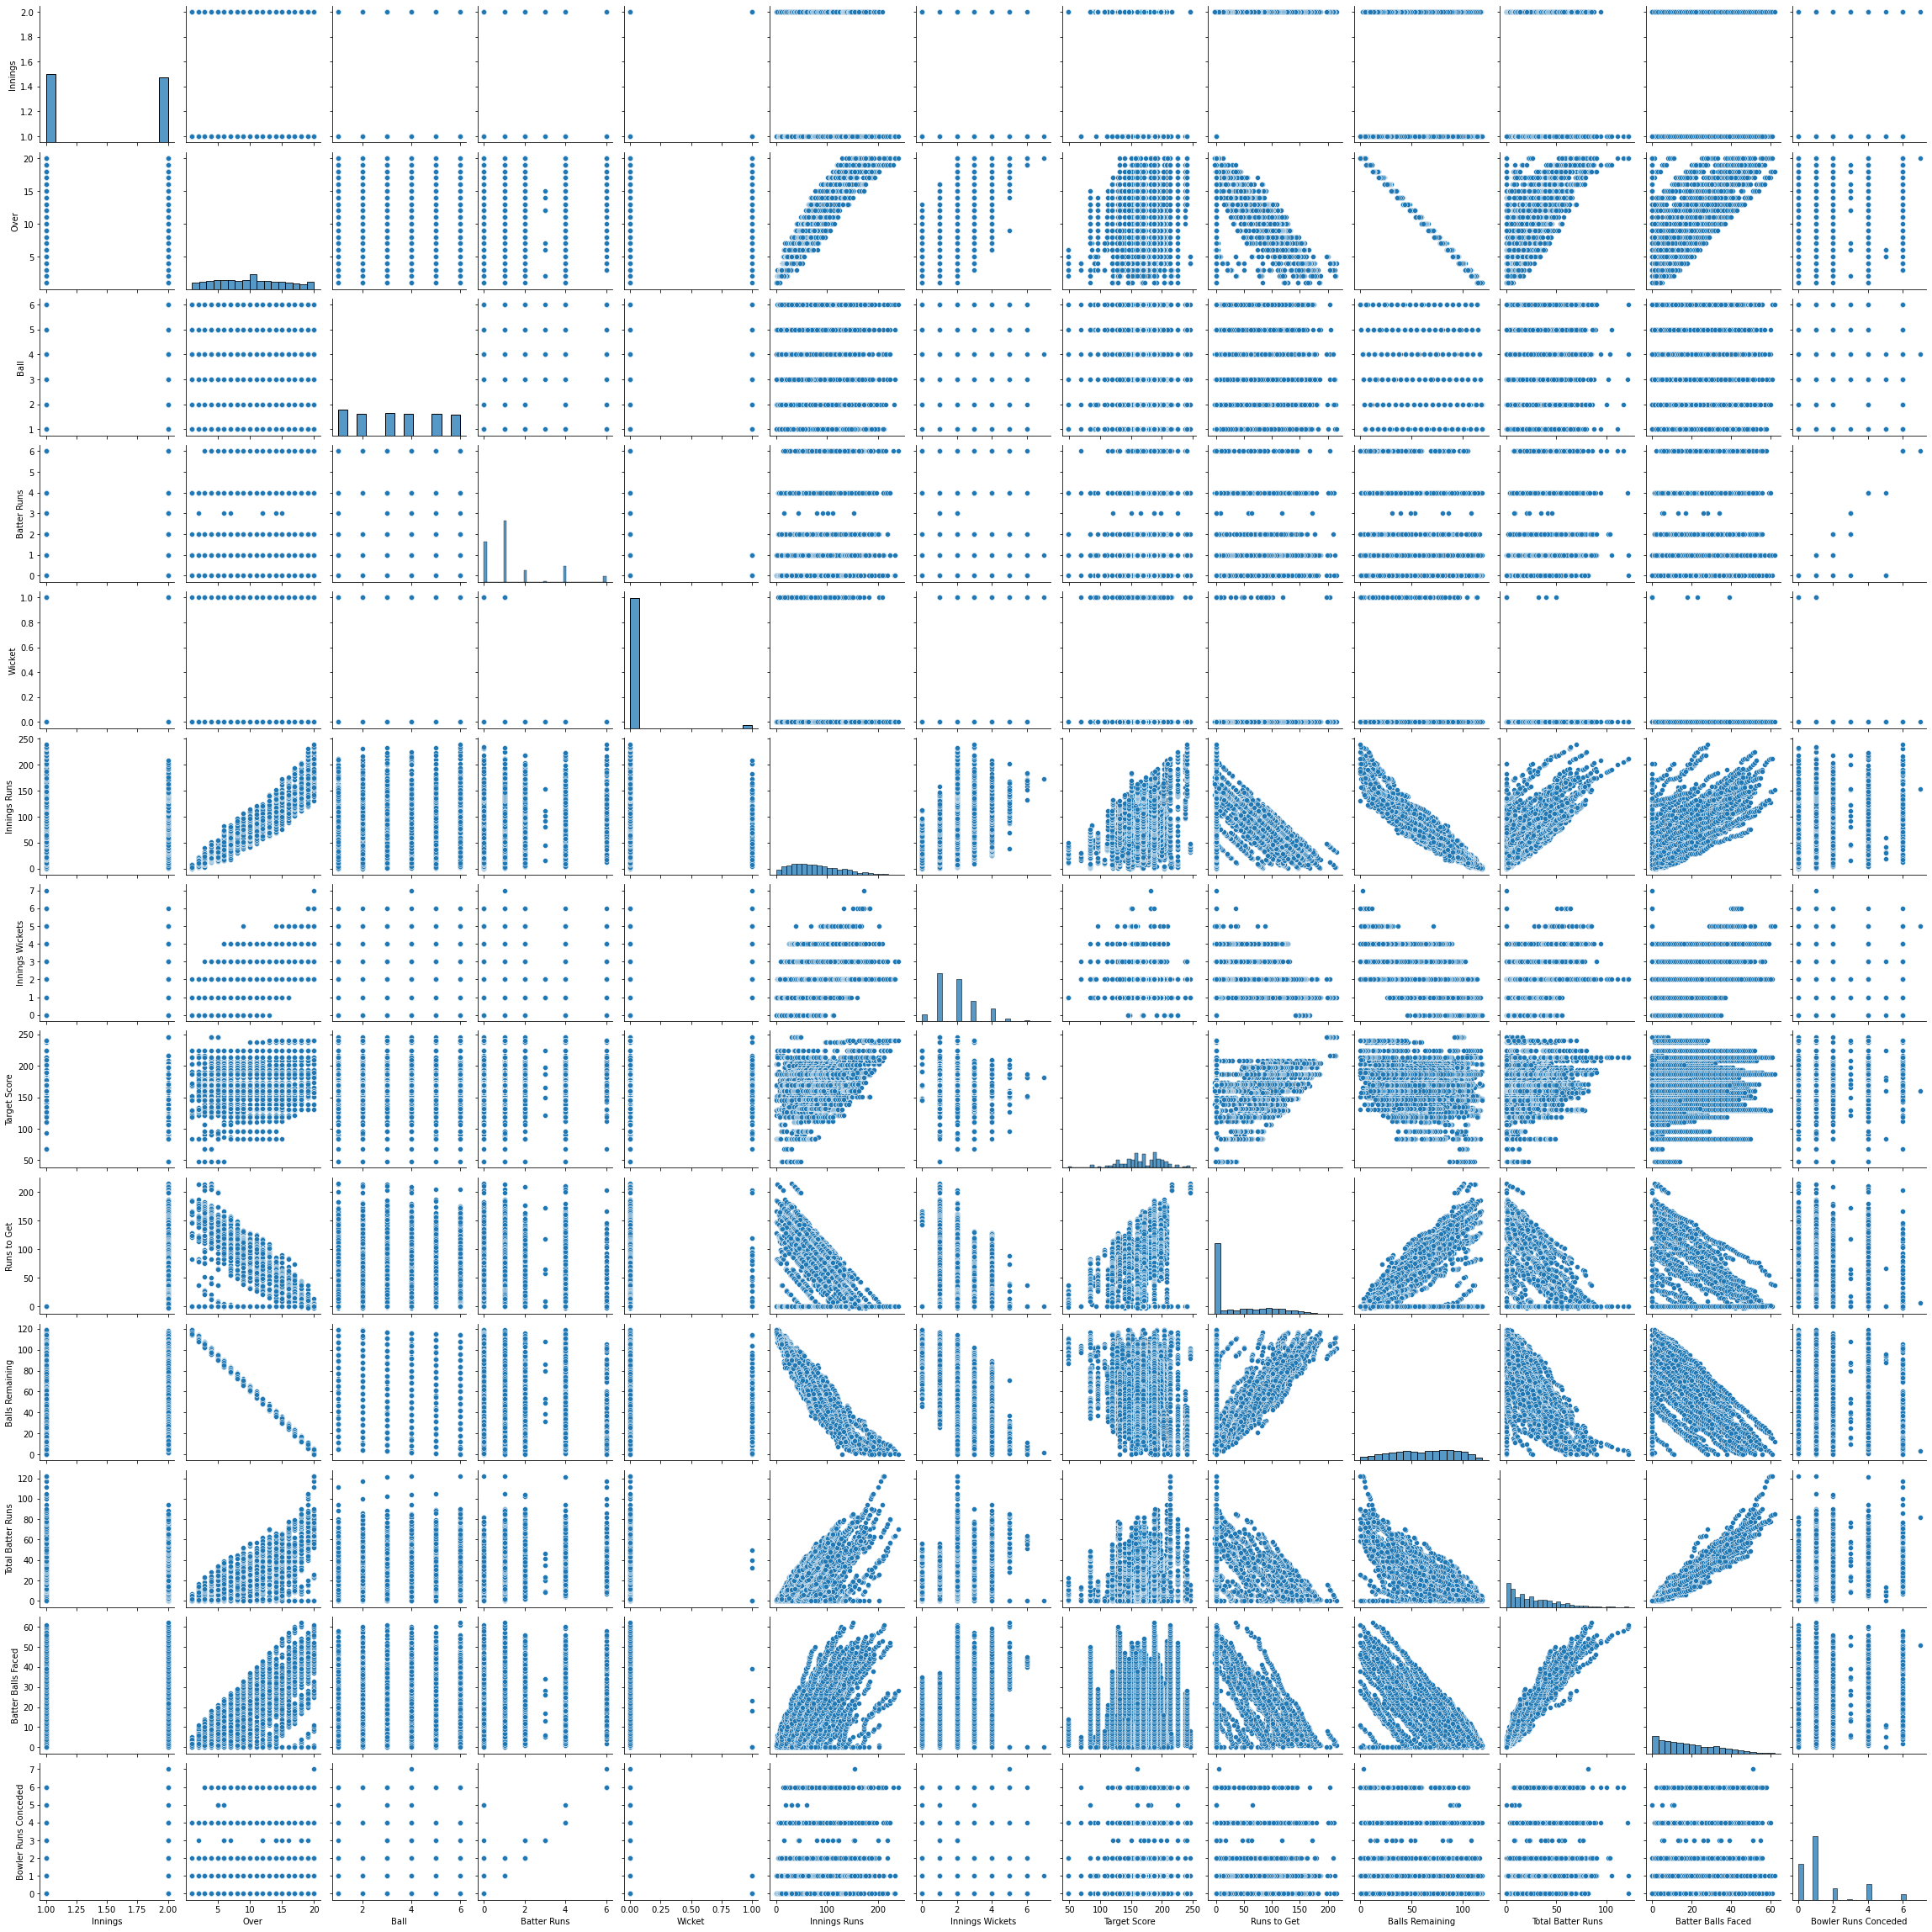

In [17]:
sns.pairplot(selected_rows)
plt.show()

#### Visualising Categorical Variables

As there are a few categorical variables so let's make a boxplot for some of these variables.

##### Using Box Plot

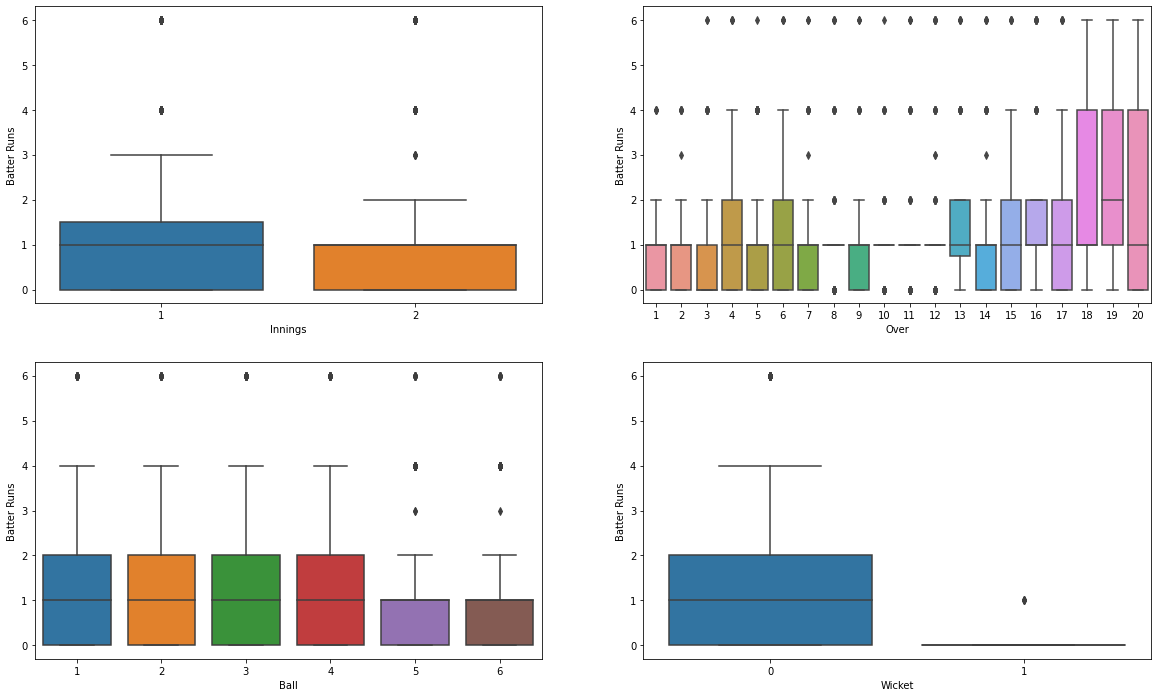

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Innings', y = 'Batter Runs', data = selected_rows)
plt.subplot(2,2,2)
sns.boxplot(x = 'Over', y = 'Batter Runs', data = selected_rows)
plt.subplot(2,2,3)
sns.boxplot(x = 'Ball', y = 'Batter Runs', data = selected_rows)
plt.subplot(2,2,4)
sns.boxplot(x = 'Wicket', y = 'Batter Runs', data = selected_rows)
plt.show()

##### Using Box Plot

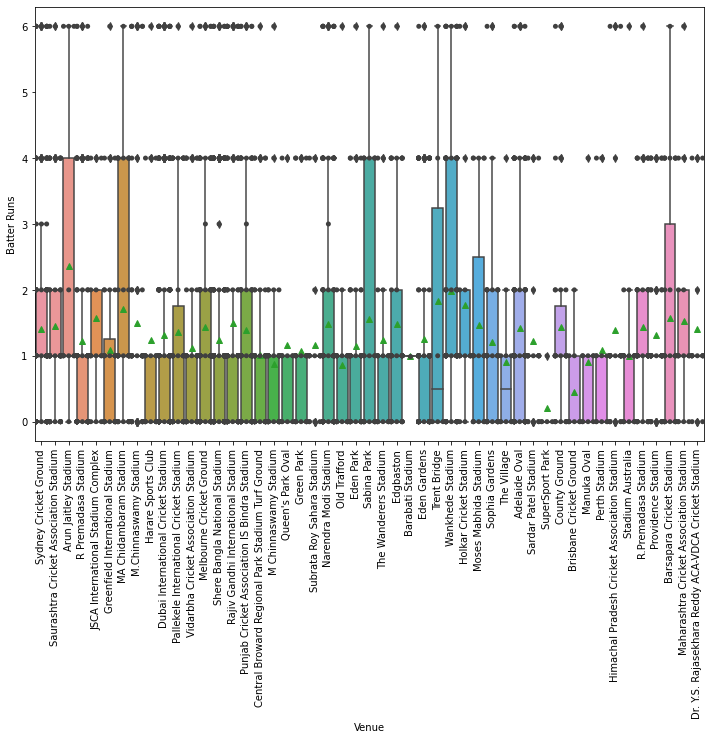

In [19]:
# Create a figure
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='Venue', y='Batter Runs', data=selected_rows, showmeans=True)

# Create the jittered data points using swarmplot
sns.swarmplot(x='Venue', y='Batter Runs', data=selected_rows, color='0.25')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

##### Using Violin Plot

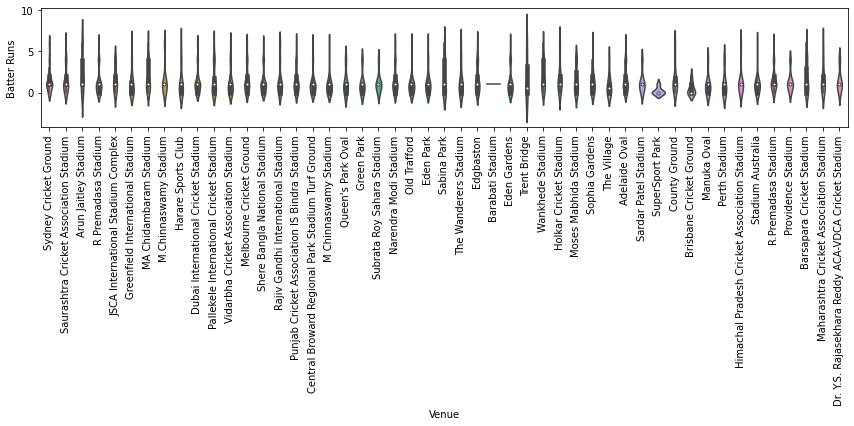

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6)) 

# Violin plot for 'Venue' and 'Batter Runs' data
sns.violinplot(x='Venue', y='Batter Runs', data=selected_rows, ax=axes)

# Rotate x-axis labels for better readability
axes.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Data Preparation

#### Creating dummy vars

In [21]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 5954 to 424298
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Venue                 2798 non-null   object
 1   Innings               2798 non-null   int64 
 2   Over                  2798 non-null   int64 
 3   Ball                  2798 non-null   int64 
 4   Bowler                2798 non-null   object
 5   Batter Runs           2798 non-null   int64 
 6   Wicket                2798 non-null   int64 
 7   Innings Runs          2798 non-null   int64 
 8   Innings Wickets       2798 non-null   int64 
 9   Target Score          2798 non-null   int64 
 10  Runs to Get           2798 non-null   int32 
 11  Balls Remaining       2798 non-null   int64 
 12  Total Batter Runs     2798 non-null   int64 
 13  Batter Balls Faced    2798 non-null   int64 
 14  Bowler Runs Conceded  2798 non-null   int64 
dtypes: int32(1), int64(12), object(2)

In [22]:
selected_rows.head()

,Venue,Innings,Over,Ball,Bowler,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded
5954,Sydney Cricket Ground,1,3,5,PA van Meekeren,1,0,12,1,180,0,103,1,1,1
5956,Sydney Cricket Ground,1,4,1,BFW de Leede,1,0,19,1,180,0,101,2,2,1
5962,Sydney Cricket Ground,1,5,1,FJ Klaassen,0,0,23,1,180,0,95,2,3,0
5963,Sydney Cricket Ground,1,5,2,FJ Klaassen,1,0,24,1,180,0,94,3,4,1
5968,Sydney Cricket Ground,1,6,1,PA van Meekeren,0,0,28,1,180,0,89,3,5,0


In [23]:
# Checking total number of bowlers
total_bowlers = selected_rows['Bowler'].nunique()
total_bowlers

212

In [24]:
# Since there are total 212 number of bowlers and we can't applly dummy variables to them 
# So taking the mean of the runs conceeded and then dropping the 'Bowler' column.
bowler_means = selected_rows.groupby('Bowler')['Bowler Runs Conceded'].mean().reset_index()

# Rename the columns for clarity
bowler_means.columns = ['Bowler', 'Average Runs Conceded']

# Merge the calculated means back into the main DataFrame
selected_rows = selected_rows.merge(bowler_means, on='Bowler', how='left')

# Drop the original 'Bowler' column if needed
selected_rows.drop('Bowler', axis=1, inplace=True)

In [25]:
selected_rows.head()

,Venue,Innings,Over,Ball,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded,Average Runs Conceded
0,Sydney Cricket Ground,1,3,5,1,0,12,1,180,0,103,1,1,1,0.875000
1,Sydney Cricket Ground,1,4,1,1,0,19,1,180,0,101,2,2,1,1.400000
2,Sydney Cricket Ground,1,5,1,0,0,23,1,180,0,95,2,3,0,1.818182
3,Sydney Cricket Ground,1,5,2,1,0,24,1,180,0,94,3,4,1,1.818182
4,Sydney Cricket Ground,1,6,1,0,0,28,1,180,0,89,3,5,0,0.875000


In [26]:
# Checking the shape of dataset
selected_rows.shape

(2798, 15)

In [27]:
total_venue = selected_rows['Venue'].nunique()
total_venue

49

In [28]:
# Calculating historical venue performance features based on the average runs and wickets at each of the 49 venues.
venue_means = selected_rows.groupby('Venue')['Innings Runs'].mean()
venue_wickets = selected_rows.groupby('Venue')['Innings Wickets'].mean()
selected_rows['Venue_Average_Runs'] = selected_rows['Venue'].map(venue_means)
selected_rows['Venue_Average_Wickets'] = selected_rows['Venue'].map(venue_wickets)

In [29]:
# Dropping the 'Venue' column
selected_rows.drop('Venue', axis=1,inplace = True)

In [30]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 0 to 2797
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Innings                2798 non-null   int64  
 1   Over                   2798 non-null   int64  
 2   Ball                   2798 non-null   int64  
 3   Batter Runs            2798 non-null   int64  
 4   Wicket                 2798 non-null   int64  
 5   Innings Runs           2798 non-null   int64  
 6   Innings Wickets        2798 non-null   int64  
 7   Target Score           2798 non-null   int64  
 8   Runs to Get            2798 non-null   int32  
 9   Balls Remaining        2798 non-null   int64  
 10  Total Batter Runs      2798 non-null   int64  
 11  Batter Balls Faced     2798 non-null   int64  
 12  Bowler Runs Conceded   2798 non-null   int64  
 13  Average Runs Conceded  2798 non-null   float64
 14  Venue_Average_Runs     2798 non-null   float64
 15  Venu

# Splitting the Data into Training and Testing Sets
 

In [31]:
#  Initiallizing df as selected_rows
df = selected_rows

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Applying MinMax Scaler

In [33]:
# Apply scaler() to all the columns except the categorical variables
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected columns
num_vars = df.columns  # All columns except "Batter Runs"
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [34]:
df_train.head()

,Innings,Over,Ball,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded,Average Runs Conceded,Venue_Average_Runs,Venue_Average_Wickets
425,1.0,0.473684,0.0,0.166667,0.0,0.250000,0.428571,0.570707,0.477064,0.546218,0.131148,0.245902,0.142857,0.415541,0.439175,0.578794
201,1.0,0.473684,0.4,0.666667,0.0,0.262500,0.571429,0.323232,0.238532,0.529412,0.057377,0.098361,0.571429,0.324324,0.393436,0.973514
208,1.0,0.578947,0.8,0.166667,0.0,0.316667,0.571429,0.323232,0.178899,0.411765,0.073770,0.213115,0.142857,0.324324,0.393436,0.973514
584,1.0,0.421053,0.8,0.000000,0.0,0.216667,0.285714,0.505051,0.454128,0.563025,0.278689,0.524590,0.000000,0.341394,0.421722,0.499058
106,0.0,0.578947,0.2,0.000000,0.0,0.433333,0.428571,0.621212,0.013761,0.436975,0.049180,0.114754,0.000000,0.708709,0.321302,0.534360


In [35]:
df_train.describe()

,Innings,Over,Ball,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded,Average Runs Conceded,Venue_Average_Runs,Venue_Average_Wickets
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,0.487743,0.478039,0.485700,0.226932,0.027579,0.323798,0.279221,0.601015,0.201165,0.521914,0.201481,0.310002,0.199839,0.452207,0.406171,0.478154
std,0.499977,0.264712,0.344591,0.254968,0.163806,0.201666,0.165891,0.168407,0.242519,0.253874,0.173694,0.231064,0.217623,0.138404,0.141805,0.136117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.200000,0.000000,0.000000,0.162500,0.142857,0.505051,0.013761,0.319328,0.057377,0.114754,0.000000,0.364865,0.319472,0.452782
50%,0.000000,0.473684,0.400000,0.166667,0.000000,0.295833,0.285714,0.611111,0.013761,0.546218,0.163934,0.262295,0.142857,0.433955,0.421722,0.496846
75%,1.000000,0.684211,0.800000,0.166667,0.000000,0.457292,0.428571,0.722222,0.394495,0.731092,0.311475,0.475410,0.285714,0.527027,0.484445,0.539995
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


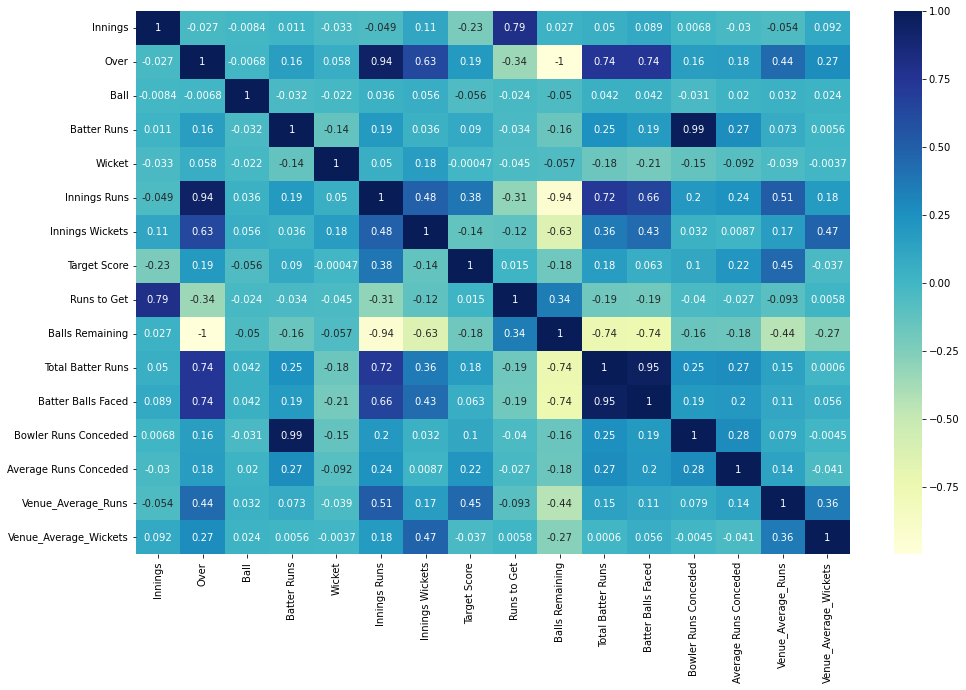

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

######  `Batter Runs` and `Bowler Runs Conceded` are most corelated, So let's make a pairplot for `Batter Runs` vs `Bowler Runs Conceded`.

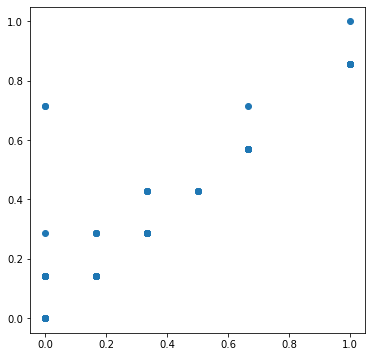

In [37]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['Batter Runs'], df_train['Bowler Runs Conceded'])
plt.show()

In [38]:
df_train.shape

(1958, 16)

### Dividing into X and Y for model

In [39]:
y_train = df_train.pop('Batter Runs')
X_train = df_train

# Building a linear model

#### First Model

In [40]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['Bowler Runs Conceded']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Check the parameters obtained

lr.params

const                  -0.004320
Bowler Runs Conceded    1.157192
dtype: float64

In [42]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 7.805e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:22:47   Log-Likelihood:                 3531.3
No. Observations:                1958   AIC:                            -7059.
Df Residuals:                    1956   BIC:                            -7047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0043 

##### Adding all columns

In [43]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    22.625774
Innings                  -0.001391
Over                    -21.669258
Ball                     -0.951260
Wicket                   -0.004944
Innings Runs              0.015445
Innings Wickets           0.003786
Target Score             -0.005644
Runs to Get               0.006742
Balls Remaining         -22.619692
Total Batter Runs         0.010022
Batter Balls Faced       -0.011101
Bowler Runs Conceded      1.157532
Average Runs Conceded    -0.000130
Venue_Average_Runs       -0.012340
Venue_Average_Wickets    -0.001194
dtype: float64

In [44]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.889e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:22:47   Log-Likelihood:                 4783.3
No. Observations:                1958   AIC:                            -9535.
Df Residuals:                    1942   BIC:                            -9445.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    22.62

In [45]:
X = X_train_lm

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,458240.59
2,Over,29545.10
9,Balls Remaining,29513.41
3,Ball,97.21
5,Innings Runs,23.25
11,Batter Balls Faced,22.12
10,Total Batter Runs,21.02
8,Runs to Get,5.51
1,Innings,5.18
7,Target Score,2.70


In [48]:
X = X.drop('Average Runs Conceded', 1)

In [49]:
X = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X).fit()

In [50]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.025e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:22:47   Log-Likelihood:                 4783.3
No. Observations:                1958   AIC:                            -9537.
Df Residuals:                    1943   BIC:                            -9453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    22.62

In [51]:
X = X.drop('Venue_Average_Wickets', 1)

In [52]:
# Build a third fitted model
X = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X).fit()

In [53]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.182e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:22:47   Log-Likelihood:                 4783.3
No. Observations:                1958   AIC:                            -9539.
Df Residuals:                    1944   BIC:                            -9460.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6187 

In [54]:
X = X.drop(['const'], axis=1)

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Over,100.63
4,Innings Runs,80.90
10,Batter Balls Faced,61.31
9,Total Batter Runs,48.34
6,Target Score,37.00
12,Venue_Average_Runs,17.36
8,Balls Remaining,12.44
0,Innings,10.08
7,Runs to Get,9.27
5,Innings Wickets,8.67


In [56]:
X = X.drop('Innings', 1)

In [58]:
# Build a fourth fitted model
X = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.889e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:12   Log-Likelihood:                 4783.3
No. Observations:                1958   AIC:                            -9535.
Df Residuals:                    1942   BIC:                            -9445.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    22.62

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Over,110.12
4,Innings Runs,83.13
10,Batter Balls Faced,61.92
9,Total Batter Runs,49.30
6,Target Score,37.06
14,Venue_Average_Wickets,21.77
13,Venue_Average_Runs,19.27
8,Balls Remaining,17.12
12,Average Runs Conceded,14.01
0,Innings,10.09


In [61]:
X = X.drop('Innings Wickets', 1)

In [62]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.580e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:12   Log-Likelihood:                 4782.7
No. Observations:                1958   AIC:                            -9541.
Df Residuals:                    1946   BIC:                            -9475.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6206 

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Over,110.12
4,Innings Runs,83.13
10,Batter Balls Faced,61.92
9,Total Batter Runs,49.30
6,Target Score,37.06
14,Venue_Average_Wickets,21.77
13,Venue_Average_Runs,19.27
8,Balls Remaining,17.12
12,Average Runs Conceded,14.01
0,Innings,10.09


In [65]:
X = X.drop('Total Batter Runs', 1)

In [66]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.839e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:12   Log-Likelihood:                 4782.4
No. Observations:                1958   AIC:                            -9543.
Df Residuals:                    1947   BIC:                            -9481.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6275 

In [68]:
X = X.drop('Target Score', 1)

In [69]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [70]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.154e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:13   Log-Likelihood:                 4781.8
No. Observations:                1958   AIC:                            -9544.
Df Residuals:                    1948   BIC:                            -9488.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6372 

In [71]:
X = X.drop('Batter Balls Faced', 1)

In [72]:
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.547e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:13   Log-Likelihood:                 4780.9
No. Observations:                1958   AIC:                            -9544.
Df Residuals:                    1949   BIC:                            -9494.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6489 

In [74]:
X = X.drop('Wicket', 1)

In [75]:
# Build a ninth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.054e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:13   Log-Likelihood:                 4780.5
No. Observations:                1958   AIC:                            -9545.
Df Residuals:                    1950   BIC:                            -9500.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6389 

In [77]:
X = X.drop('Innings Runs', 1)

In [78]:
# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [79]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:            Batter Runs   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.725e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:13   Log-Likelihood:                 4779.2
No. Observations:                1958   AIC:                            -9544.
Df Residuals:                    1951   BIC:                            -9505.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.6009 

In [80]:
X = X.drop('const', 1)

In [81]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Venue_Average_Runs,11.50
0,Over,7.33
3,Balls Remaining,4.65
1,Ball,2.89
2,Runs to Get,1.93
4,Bowler Runs Conceded,1.90


### Predicting

In [82]:
y_train_price = lr_10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

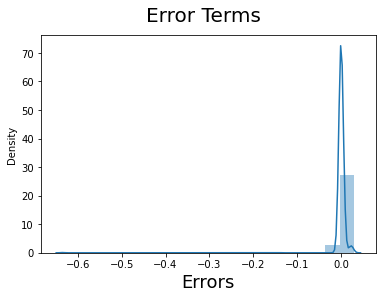

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [84]:
num_vars = df.columns  # All columns except "Batter Runs"

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [85]:
df_test.describe()

,Innings,Over,Ball,Batter Runs,Wicket,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Total Batter Runs,Batter Balls Faced,Bowler Runs Conceded,Average Runs Conceded,Venue_Average_Runs,Venue_Average_Wickets
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.490476,0.487531,0.465000,0.222817,0.022619,0.327619,0.279252,0.602682,0.204658,0.513745,0.209016,0.322600,0.198810,0.454807,0.409802,0.472346
std,0.500207,0.266275,0.345119,0.257946,0.148774,0.201481,0.164486,0.167574,0.247421,0.255640,0.176473,0.236547,0.220020,0.135146,0.140191,0.131977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.200000,0.000000,0.000000,0.166667,0.142857,0.505051,0.013761,0.308824,0.065574,0.131148,0.000000,0.366892,0.319472,0.431153
50%,0.000000,0.473684,0.400000,0.166667,0.000000,0.306250,0.285714,0.611111,0.013761,0.521008,0.163934,0.262295,0.142857,0.433955,0.421722,0.496846
75%,1.000000,0.684211,0.800000,0.166667,0.000000,0.470833,0.428571,0.722222,0.408257,0.731092,0.327869,0.491803,0.285714,0.523104,0.484445,0.539995
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.912500,0.857143,1.000000,0.981651,1.000000,0.991803,1.016393,0.857143,1.000000,1.000000,1.000000


In [86]:
y_test = df_test.pop('Batter Runs')
X_test = df_test

In [87]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [89]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['Innings','Wicket','Innings Runs','Innings Wickets','Target Score','Total Batter Runs','Batter Balls Faced','Average Runs Conceded','Venue_Average_Wickets'], axis = 1)

In [91]:
y_pred_m4 = lr_10.predict(X_test_m4)

## Model Evaluation

Text(0, 0.5, 'y_pred')

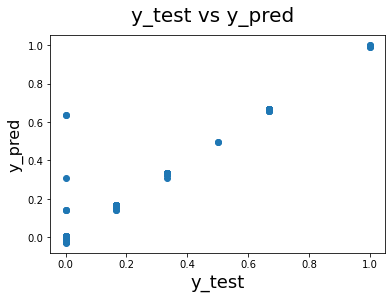

In [92]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred_m4))

0.03429627961184046

In [95]:
r_squared = r2_score(y_test, y_pred_m4)
r_squared

0.9823007813028312